In [1]:
d = 2.4 #m
S0 = 0.0013
d50 = 0.9 #mm
d90 = 3.5 #mm
rho = 2480 #kg / m^3
Ks = 2 * d90
g = 9.81
nu = 10 ** -6
mu = 10 ** -3

### A: وقوع حرکت رسوبات
### 1: حرکت بار بستر
### $V_* = \sqrt{gdsin(\theta)}$
### $\tau_* = \frac{\tau_0}{\rho(s-1)gd_s}$ and $ \tau_0 = \rho V_*^2 $ 
### $ Re_* = \frac{V_*d_s}{\nu} $

In [25]:
g = 10; s0 = 0.005; d = 1.1
V_star = (g * d * S0)**(0.5)
print("V* = %f m/s"%V_star)

V* = 0.119583 m/s


In [26]:
rho = 2500
tau_0 = rho * V_star**2
print("tau sefr = %f pa"%tau_0)

tau sefr = 35.750000 pa


In [29]:
rho = 2500; d50 = 1.5; g = 10; s = 2.5
tau_star = tau_0 / (rho * (s - 1) * g * (d50/1000))
print("tau* = %f pa"%tau_star)

tau* = 0.635556 pa


In [30]:
d50 = 1.5; 
Re_star = (V_star * (d50/1000)) / nu
print("Re* = %f"%Re_star)

Re* = 179.373911


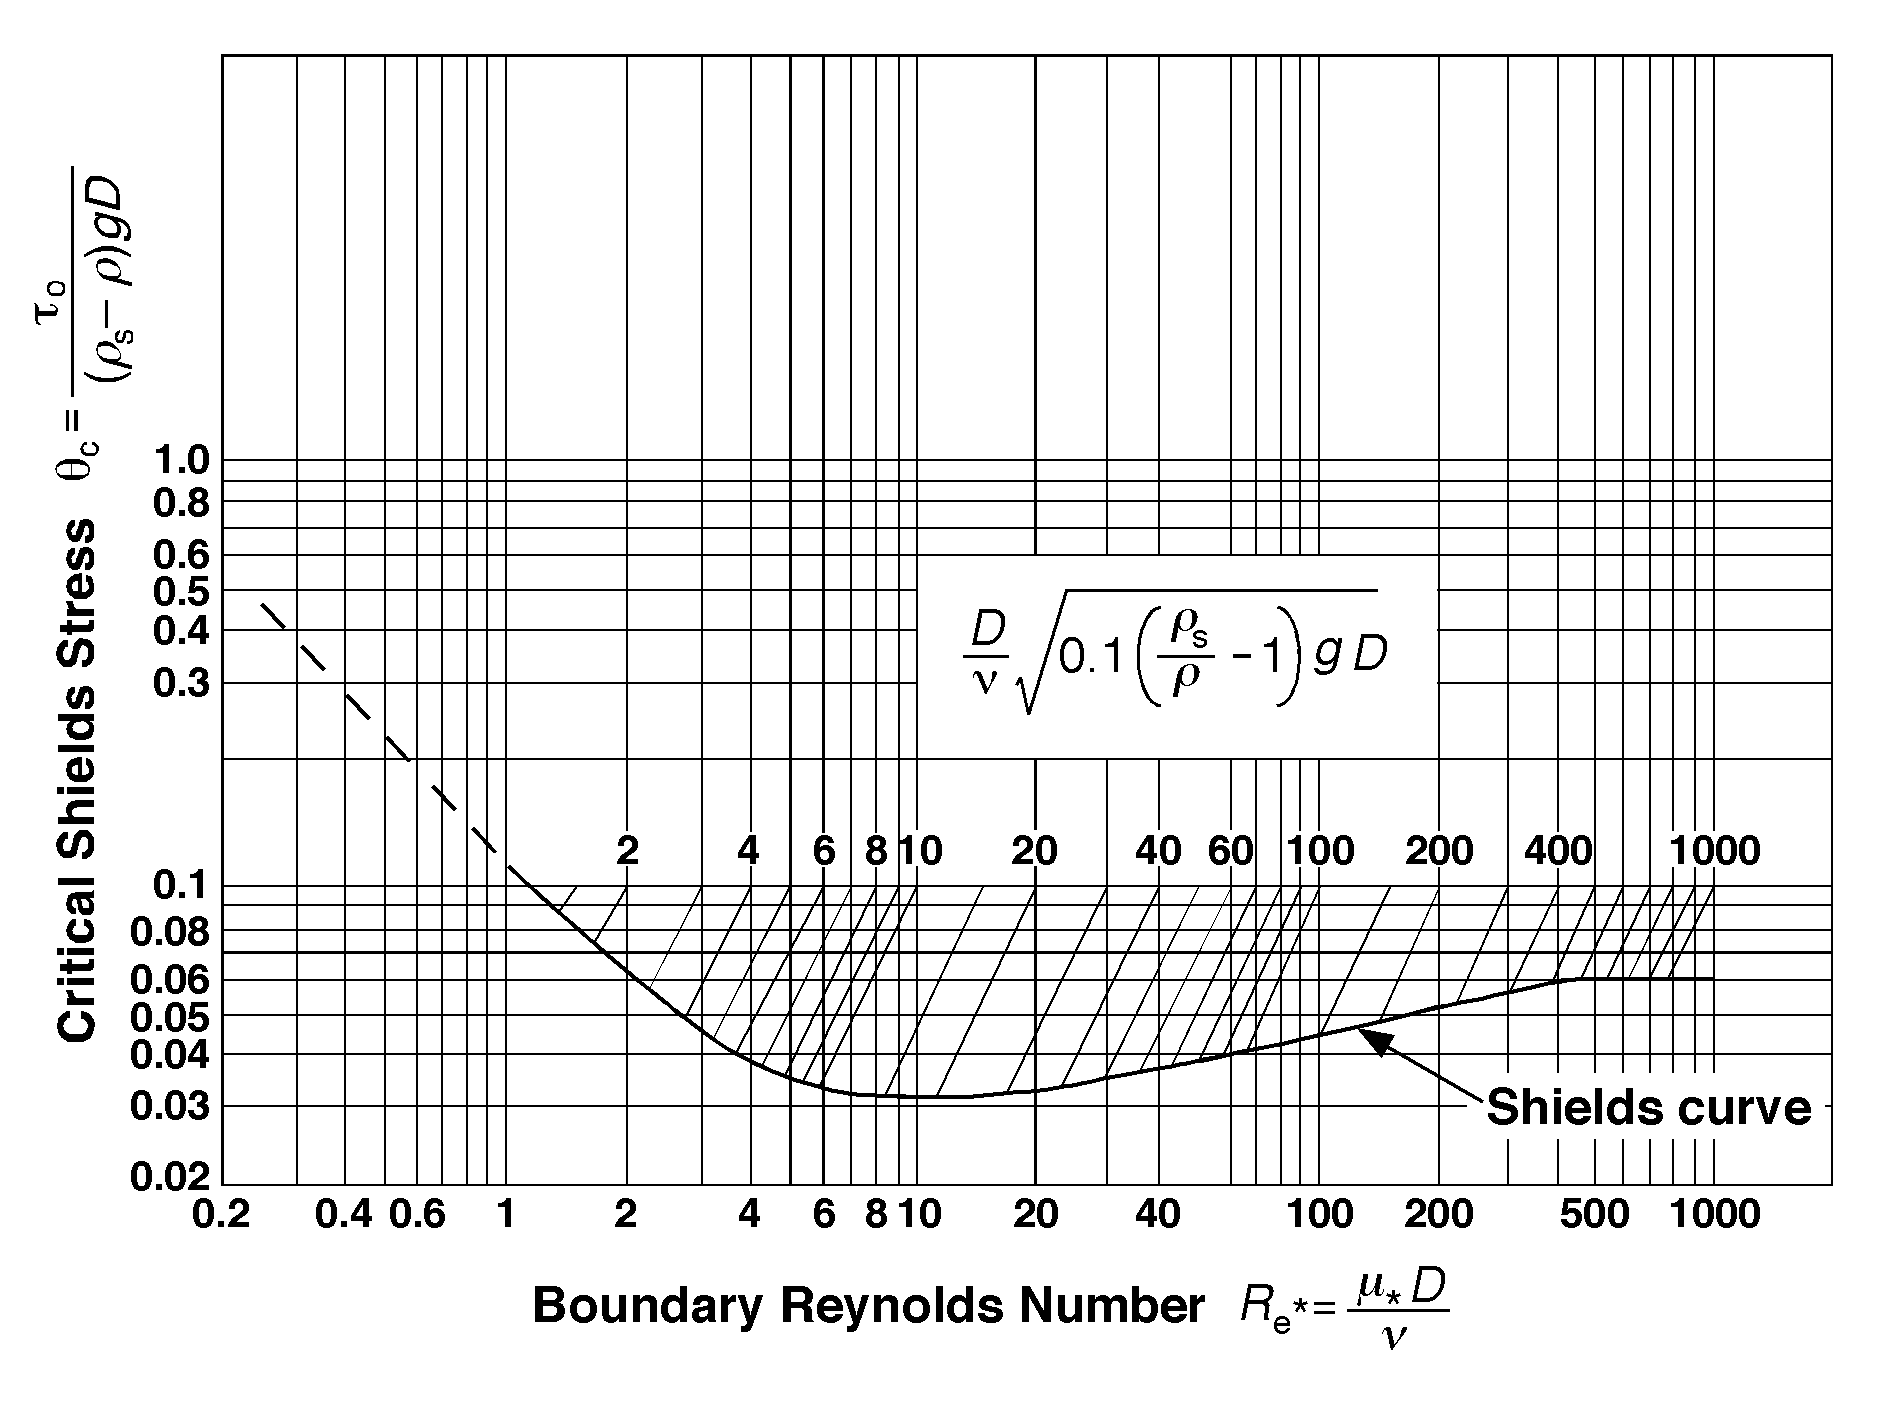

In [6]:
import IPython.display as ID
shields = ID.Image("shields diagram.jpeg")
ID.display(shields)

In [7]:
Sc = 0.048
if Sc < tau_star:
    print('Sc = %f' % Sc)
    print("بار بستر حرکت میکند")
else:
    print('Sc = %f' % Sc)
    print('بار بستر حرکت نمیکند')

Sc = 0.048000
بار بستر حرکت میکند


### 2: معلق شدن رسوبات 
### $ w_0 = \sqrt{\frac{4gd_s(s-1)}{3(\frac{24\mu}{\rho w_0d_s}) + 1.5}} $

In [32]:
from sympy.solvers import solve
from sympy import Symbol
g = 10; d50 = 1.5; rho = 2500
W_0 = Symbol('W_0')
javab = solve(W_0 -( (((4 * g * (d50/1000) * (2.5 - 1))) / ((3 * ((24 * mu) / (rho * W_0 * (d50/1000)))) + 1.5) )**(0.5) ), W_0)
W_0 = float(javab[0])
W_0

0.23863256926376133

In [33]:
taligh = V_star / W_0
print(taligh)
critical = 1
if taligh > critical:
    print("ذرات معلق میشوند")
else:
    print("ذرات معلق نمیشوند")

0.5011160370939934
ذرات معلق نمیشوند


### محاسبه سرعت میانگین جریان
### حل دو معادله دو مجهول
### $V = \sqrt{\frac{8g}{f}dsin(\theta)}$ and $A / f^{0.5}$
### $\frac{1}{\sqrt{f}} = -2log(\frac{K_s}{3.71D_h}(B)+\frac{2.51\mu(C)}{VD_h\sqrt{f}})$

In [10]:
from scipy.optimize import fsolve
from math import sqrt, log
from sympy import Symbol, nsolve
from math import sqrt, log, exp

In [34]:
A = 30 * 1.1
print ("V = %f / sqrt(f)"%A)
print('%f V = 1 / sqrt(f)'%(1/A))

V = 33.000000 / sqrt(f)
0.030303 V = 1 / sqrt(f)


### $9.8V = -2log(\frac{K_s}{3.71D_h}(B)+\frac{2.51\mu(C)}{D_h9.8V^2})$

In [35]:
d = 1.1; ks = 1.5
B = Ks / (3.71 * 4 * d)
C = (2.51 * mu) / (9.8 * 4)
print ("B = %f and C = %f" % (B, C))

B = 0.428816 and C = 0.000064


### $9.8V = -2log(0.196541+\frac{0.002510}{D_h9.8V^2})$

In [42]:
from scipy.optimize import fsolve
from sympy import Symbol, nsolve, sqrt, log
d = 1.1 #m
S0 = 0.005
d50 = 1.5 #mm
#d90 = 3.5 #mm
rho = 2500 #kg / m^3
Ks = d50
g = 10
nu = 10 ** -6
mu = 10 ** -3
A = 30 * 1.1
B = (Ks*(10**-3)) / (3.71 * 4 * d)
C = 2.51 * mu
V = Symbol("V")
f = Symbol("f")
eq1 = V - sqrt(A / f)
eq2 = (1 / sqrt(f)) + 2*log(B + (C / (V * 4 * d * sqrt(f))))
numeric_root = nsolve((eq1, eq2), (V, f), [1, 0.001])
numeric_root

Matrix([
[   98.3725227888515 + 5.39225835944159e-29*I],
[0.00341009377263256 + 3.59335821704828e-31*I]])

In [14]:
def need_to_solve(x): # x is a list, x = [V, f], V = x[0] and f = x[1]
    return [x[0] - sqrt(A / x[1]),
            (1 / sqrt(x[1])) + 2*log(B + (C / (x[0] * 4 * d * sqrt(x[1]))))]
from scipy.optimize import fsolve
A = 8 * g * d * S0
B = (Ks*(10**-3)) / (3.71 * 4 * d)
C = 2.51 * mu
root = fsolve(need_to_solve, [3, 0.001])
root

array([7.15470940e+00, 4.78332171e-03])

In [15]:
V, f = tuple(root)
print('the velocity of flow is %f'%V)

the velocity of flow is 7.154709


# نوع فرم بستر

In [16]:
Fr = V / ((g * d)**0.5)
print("bed form is:")
if Fr < 0.1:
    print("Ripples bed")
elif Fr < 1 and Fr > 0.1:
    print("Dunes bed")
elif Fr > 1:
    print("Antidunes bed")

bed form is:
Antidunes bed


# ظرفیت کل انتقال رسوبات
### $ q_s = (q_s)_{b1} + (q_s)_s $
### $ (q_s)_{b1} $ = Bed load transport rate
### $ (q_s)_{b1} = C_s\delta_s V_s $ 
### $(q_s)_s $ = suspended-sedimaent transport rate
### $(q_s)_s = (C_s)_{mean} q$

In [17]:
nesbat = tau_star / Sc
print(nesbat)

48.79879879879879


### $ Cs = \frac{0.117}{d_{50}}(\frac{\mu^2}{(s-1)g})^{1/2}(\frac{\tau^*}{\tau_c}-1) $

In [18]:
s = 2.480
Cs = (0.117 / d50 * (10**-3)) * (((mu**2) / ((s - 1) * g))**(0.5)) * (nesbat - 1)
print("Cs = %f"%Cs)

Cs = 0.000002


### $\delta_s = 0.3d_s(d_s (\frac{g(s-1)}{\nu ^ 2})^{1/3})^{0.7}\sqrt{\frac{\tau^*}{\tau_c}-1}$

In [19]:
delta_s = 0.3 * (d50/1000) * ((d50/1000) * (g * (s-1) / (nu**2))**(1/3))**(0.7) * sqrt(nesbat - 1)
print("delta(s) = %f"%delta_s)

delta(s) = 0.016224


In [20]:
Vs = 7 * V_star
print("V(s) = %f"%Vs)

V(s) = 1.224644


In [21]:
qs_b1 = Cs * delta_s * Vs
print("qs(b1) = ", qs_b1, "m^2 /s")

qs(b1) =  3.24014163830336e-8 m^2 /s
